In [1]:
import tensorflow as tf
import numpy as np

In [2]:
model = tf.saved_model.load('COMPLETE_MODEL_HUBER_5')

In [7]:
import utilities
import matplotlib.pyplot as plt

In [4]:
output_dim = 8
timesteps = 6
batch_size = 10

In [5]:
inputs, outputs = utilities.Input_Generator(output_dim,20,batch_size)
y_pred = model.call(inputs)

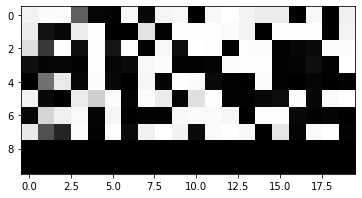

In [6]:
plt.imshow(tf.transpose(y_pred[0][1]),cmap = plt.cm.binary_r)

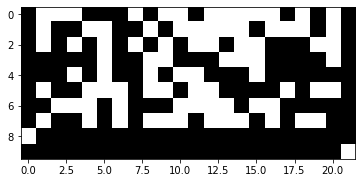

In [7]:
plt.imshow(tf.transpose(inputs[1]),cmap = plt.cm.binary_r)

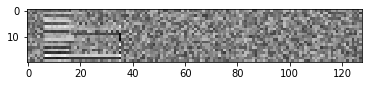

In [8]:
plt.imshow(tf.transpose(y_pred[1]['Memory_Matrix'][1]),cmap = plt.cm.binary_r)

## Read Weights

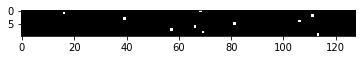

In [9]:
plt.imshow((y_pred[1]['All_Weight_vectors'][0]),cmap = plt.cm.binary_r)

## Write Weights

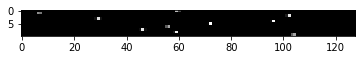

In [10]:
plt.imshow((y_pred[1]['All_Weight_vectors'][1]),cmap = plt.cm.binary_r)

## Loading Test Final Results (7900 epochs after injection)

In [14]:
train_results = np.load('TEST RESULTS/ALL_TRAINING_PREDICTIONS.npy', allow_pickle=True)

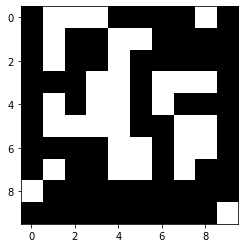

In [34]:
plt.imshow(tf.transpose(train_results[0][0][2]),cmap = plt.cm.binary_r)

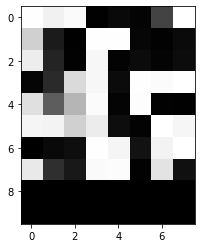

In [33]:
plt.imshow(tf.transpose(train_results[0][1][2]),cmap = plt.cm.binary_r)

In [35]:
test_results = np.load('TEST RESULTS/ALL_TEST_PREDICTIONS.npy', allow_pickle=True)

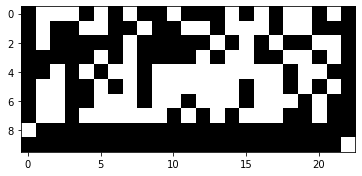

In [50]:
plt.imshow(tf.transpose(test_results[0][0][5]),cmap = plt.cm.binary_r)

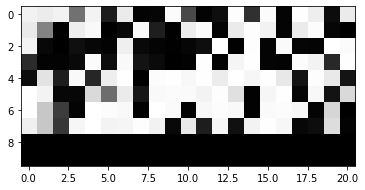

In [51]:
plt.imshow(tf.transpose(test_results[0][1][5]),cmap = plt.cm.binary_r)

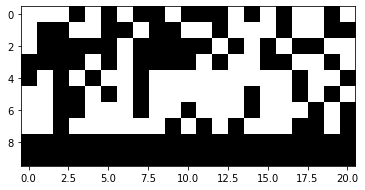

In [55]:
plt.imshow(tf.transpose(test_results[0][0][5][1:-1]),cmap = plt.cm.binary_r)

## Should we increase or decrease $\delta$ in Huber Loss for better training?

In [72]:
y_true = test_results[0][0][5][1:-1]
y_pred = test_results[0][1][5]
delta = 0.001
tf.reduce_mean(tf.where(tf.abs(y_true-y_pred) < delta,.5*(y_true-y_pred)**2 , delta*(tf.abs(y_true-y_pred)-0.5*delta)))

<tf.Tensor: id=8808, shape=(), dtype=float32, numpy=4.3240303e-05>

In [62]:
tf.abs(y_true-y_pred) < 0.001

<tf.Tensor: id=8570, shape=(21, 10), dtype=bool, numpy=
array([[False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
   

so we should indeed decrease our delta, but by how much output will change if, say, I keep my delta to be equal to 0.001?

In [63]:
y_pred = 0.001 + y_true

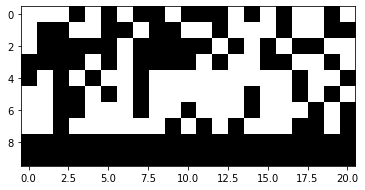

In [64]:
plt.imshow(tf.transpose(y_pred),cmap = plt.cm.binary_r)

Which is (almost) perfect

#### Therefore we'll keep our delta to be 0.001

# Results with Huber Delta = 0.001

In [75]:
train_results = np.load('TEST RESULTS/HuberDelta = 0.001/ALL_TRAINING_PREDICTIONS.npy', allow_pickle=True)

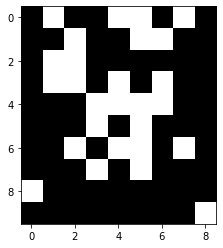

In [153]:
plt.imshow(tf.transpose(train_results[0][0][4]),cmap = plt.cm.binary_r)

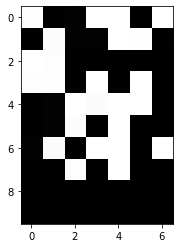

In [154]:
plt.imshow(tf.transpose(train_results[0][1][4]),cmap = plt.cm.binary_r)

Predictions!!

In [82]:
test_results = np.load('TEST RESULTS/HuberDelta = 0.001/ALL_TEST_PREDICTIONS.npy', allow_pickle=True)

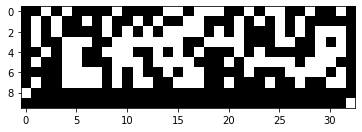

In [148]:
plt.imshow(tf.transpose(test_results[0][0][6]),cmap = plt.cm.binary_r)

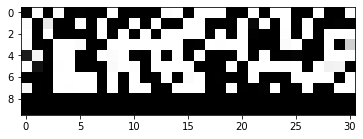

In [147]:
plt.imshow(tf.transpose(test_results[0][1][6]),cmap = plt.cm.binary_r)

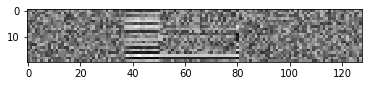

In [149]:
plt.imshow(tf.transpose(test_results[0][2]['Memory_Matrix'][6]),cmap = plt.cm.binary_r)

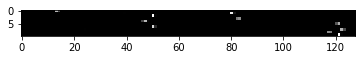

In [144]:
plt.imshow((test_results[0][2]['All_Weight_vectors'][0]),cmap = plt.cm.binary_r)

Read Weights above

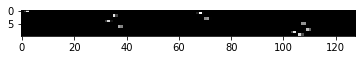

In [145]:
plt.imshow((test_results[0][2]['All_Weight_vectors'][1]),cmap = plt.cm.binary_r)

Write Weights above

# Results with Huber Delta = 0.00001

In [5]:
test_results = np.load('TEST RESULTS/HuberDelta = 0.00001/ALL_TEST_PREDICTIONS.npy', allow_pickle=True)

In [6]:
test_results.shape

(75, 3)

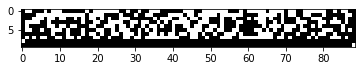

In [79]:
plt.imshow(tf.transpose(test_results[-2][0][1]),cmap = plt.cm.binary_r)

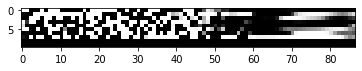

In [80]:
plt.imshow(tf.transpose(test_results[-2][1][1]),cmap = plt.cm.binary_r)

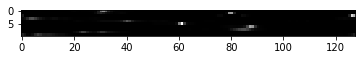

In [81]:
plt.imshow((test_results[1][2]['All_Weight_vectors'][0]),cmap = plt.cm.binary_r)

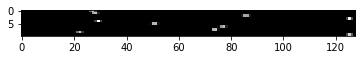

In [82]:
plt.imshow((test_results[1][2]['All_Weight_vectors'][1]),cmap = plt.cm.binary_r)

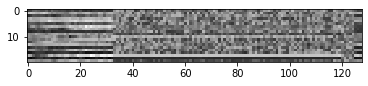

In [83]:
plt.imshow(tf.transpose(test_results[1][2]['Memory_Matrix'][3]),cmap = plt.cm.binary_r)

In [85]:
y_true = test_results[-2][0][1][1:-1]
y_pred = test_results[-2][1][1]

In [87]:
-tf.reduce_mean(y_true*tf.math.log(y_pred + 1e-8) + (1-y_true)*tf.math.log(1-y_pred + 1e-8))

<tf.Tensor: id=1159, shape=(), dtype=float32, numpy=1.0480938>

# Results with Cross-Entropy-Loss after 10,000 epochs on Huber loss 

In [91]:
test_results = np.load('TEST RESULTS/CEL_after_HU/ALL_TEST_PREDICTIONS.npy', allow_pickle=True)

In [92]:
test_results.shape

(87, 3)

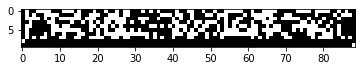

In [132]:
plt.imshow(tf.transpose(test_results[-12][0][9]),cmap = plt.cm.binary_r)

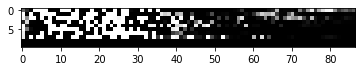

In [133]:
plt.imshow(tf.transpose(test_results[-12][1][9]),cmap = plt.cm.binary_r,)

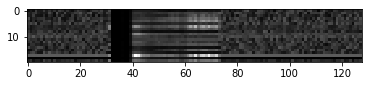

In [136]:
plt.imshow(tf.transpose(test_results[-12][2]['Memory_Matrix'][0]),cmap = plt.cm.binary_r)

In [124]:
114 - 83

31

In [126]:
24

24

In [152]:
a = np.array([[1,2,3],[4,3,2]])
b = np.array([[4,5,6,7],[8,9,6,4]])

In [153]:
a = a.reshape(2,-1,1)

In [154]:
b = b.reshape(2,1,-1)

In [157]:
tf.multiply(a,b)

<tf.Tensor: id=2032, shape=(2, 3, 4), dtype=int64, numpy=
array([[[ 4,  5,  6,  7],
        [ 8, 10, 12, 14],
        [12, 15, 18, 21]],

       [[32, 36, 24, 16],
        [24, 27, 18, 12],
        [16, 18, 12,  8]]])>

## Results of Training for 10,000 epochs on Huber Loss (with delta = 0.7) after few 1000 epochs on CEL

In [5]:
train_results = np.load('TEST RESULTS/2nd_Round_Huber7/ALL_TRAINING_PREDICTIONS.npy', allow_pickle=True)

In [7]:
train_results.shape

(101, 3)

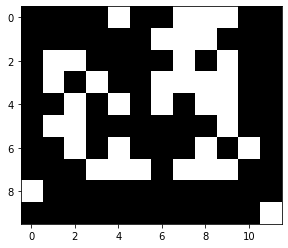

In [8]:
plt.imshow(tf.transpose(train_results[0][0][0]),cmap = plt.cm.binary_r)

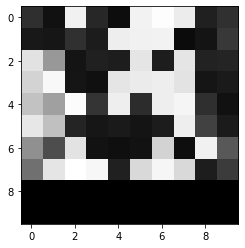

In [9]:
plt.imshow(tf.transpose(train_results[0][1][0]),cmap = plt.cm.binary_r)

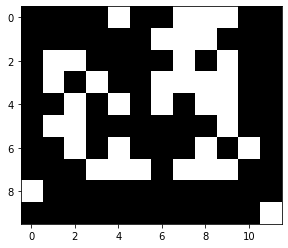

In [22]:
plt.imshow(tf.transpose(train_results[0][0][0]),cmap = plt.cm.binary_r)

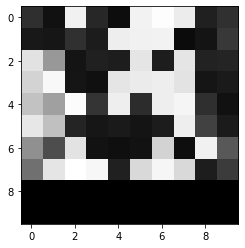

In [21]:
plt.imshow(tf.transpose(train_results[0][1][0]),cmap = plt.cm.binary_r)

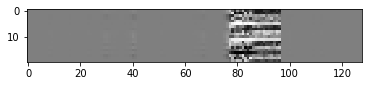

In [19]:
plt.imshow(tf.transpose(train_results[2][2]['Memory_Matrix'][0]),cmap = plt.cm.binary_r)

## Results after another 10,000 epochs training with Cross Entropy Loss

In [36]:
train_results = np.load('TEST RESULTS/2nd_Round_CEL_3/ALL_TRAINING_PREDICTIONS.npy', allow_pickle=True)
test_results = np.load('TEST RESULTS/2nd_Round_CEL_3/ALL_TEST_PREDICTIONS.npy', allow_pickle=True)

In [37]:
train_results.shape

(101, 3)

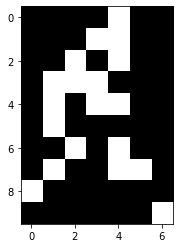

In [40]:
plt.imshow(tf.transpose(train_results[-1][0][0]),cmap = plt.cm.binary_r)

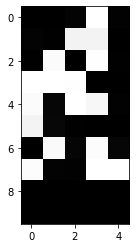

In [41]:
plt.imshow(tf.transpose(train_results[-1][1][0]),cmap = plt.cm.binary_r)

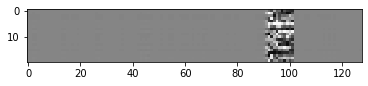

In [47]:
plt.imshow(tf.transpose(train_results[-1][2]['Memory_Matrix'][0]),cmap = plt.cm.binary_r)

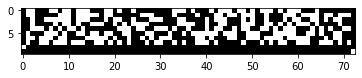

In [44]:
plt.imshow(tf.transpose(test_results[-2][0][0]),cmap = plt.cm.binary_r)

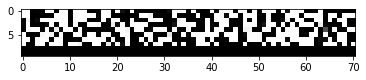

In [45]:
plt.imshow(tf.transpose(test_results[-2][1][0]),cmap = plt.cm.binary_r)

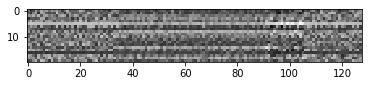

In [46]:
plt.imshow(tf.transpose(test_results[-2][2]['Memory_Matrix'][0]),cmap = plt.cm.binary_r)

## Results after 10,000 more epochs with same ol' CEL

In [2]:
train_results = np.load('TEST RESULTS/2nd_Round_CEL_4/ALL_TRAINING_PREDICTIONS.npy', allow_pickle=True)
test_results = np.load('TEST RESULTS/2nd_Round_CEL_4/ALL_TEST_PREDICTIONS.npy', allow_pickle=True)

In [5]:
train_results.shape

(101, 3)

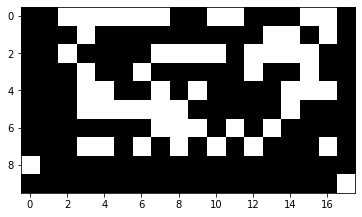

In [8]:
plt.imshow(tf.transpose(train_results[-1][0][0]),cmap = plt.cm.binary_r)

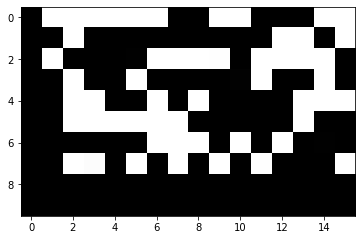

In [13]:
plt.imshow(tf.transpose(train_results[-1][1][0]),cmap = plt.cm.binary_r)

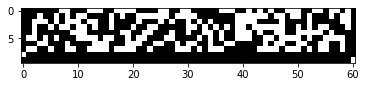

In [14]:
plt.imshow(tf.transpose(test_results[-1][0][0]),cmap = plt.cm.binary_r)

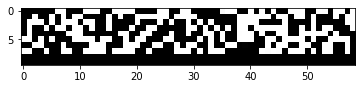

In [15]:
plt.imshow(tf.transpose(test_results[-1][1][0]),cmap = plt.cm.binary_r)

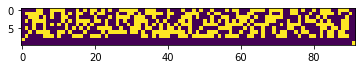

In [35]:
plt.imshow(tf.transpose(test_results[-13][0][1]),)

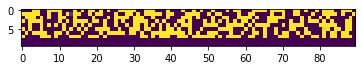

In [34]:
plt.imshow(tf.transpose(test_results[-13][1][1]),)

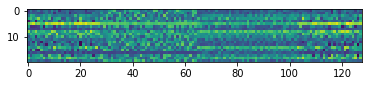

In [36]:
plt.imshow(tf.transpose(test_results[-13][2]['Memory_Matrix'][1]))

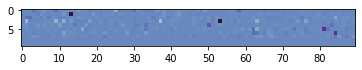

In [48]:
plt.imshow(tf.transpose(test_results[-13][0][1][1:-1]) - tf.transpose(test_results[-13][1][1]), cmap = plt.cm.twilight_shifted_r)

In [42]:
tf.transpose(test_results[-13][0][1][1:-1]) - tf.transpose(test_results[-13][1][1])

<tf.Tensor: id=1658, shape=(10, 90), dtype=float32, numpy=
array([[-3.09228897e-04, -2.77432799e-03, -1.22335553e-03,
         1.02436543e-02,  6.13152981e-04, -3.10036540e-03,
        -9.78687406e-03,  1.39772892e-03,  4.49776649e-04,
         1.24748349e-02,  4.11510468e-04, -4.73976135e-04,
        -4.42150235e-03, -4.76986170e-04,  8.71062279e-04,
        -6.96095824e-03,  1.54960155e-03, -1.79019570e-03,
         3.00276279e-03,  1.10864639e-05, -1.77392364e-03,
         1.88720226e-03, -1.48364902e-03,  7.20262527e-04,
        -1.93446875e-04, -2.24411786e-02,  9.75334644e-03,
         4.99010086e-04,  1.18452311e-03,  1.04892254e-03,
         1.42099261e-02, -3.26338410e-03, -6.26325607e-04,
         4.85152006e-03,  9.38594341e-04,  4.82803583e-03,
        -8.28525424e-03, -1.49759650e-03, -7.15148449e-03,
         1.07538700e-03, -2.58022547e-03, -6.97374344e-05,
        -4.82583046e-03,  6.36339188e-04, -1.89262629e-03,
        -3.91393900e-04,  9.43422318e-04, -3.19385529e-0